In [2]:
import numpy as np
height = [60, 62,65,68,70,74]
weight = [140, 138, 150, 166, 190, 250]
np.corrcoef(height, weight)[0]

array([1.        , 0.92989745])

In [7]:
import pandas as pd
df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
numerical_df = df.select_dtypes(include=['number'])
# Compute the correlation
numerical_df.corr()
# print(correlation_matrix)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
df.charges.corr(df.bmi)

0.19834096883362887

In [17]:
from scipy import stats
r, p = stats.pearsonr(df.charges, df.age)
print(round(r, 4))
print(round(p, 29))

0.299
5.0000000000000004e-29


In [25]:
corr_df = pd.DataFrame(columns = ["r", "p"])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
        r, p = stats.pearsonr(df.charges, df[col])
        corr_df.loc[col] = [round(r, 3), round(p, 3)]
corr_df

,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


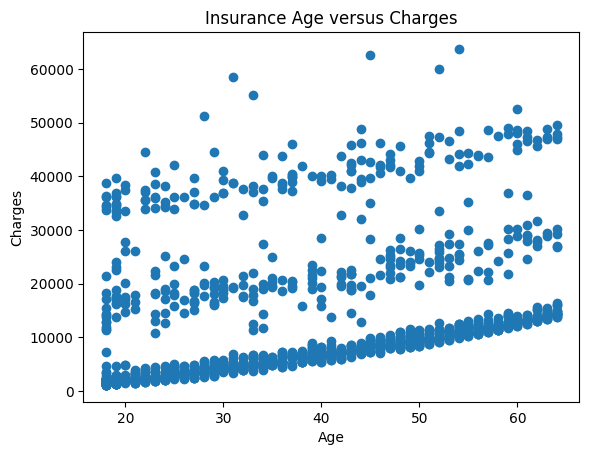

In [29]:
import matplotlib.pyplot as plt
plt.scatter(df.age, df.charges)
plt.title('Insurance Age versus Charges')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

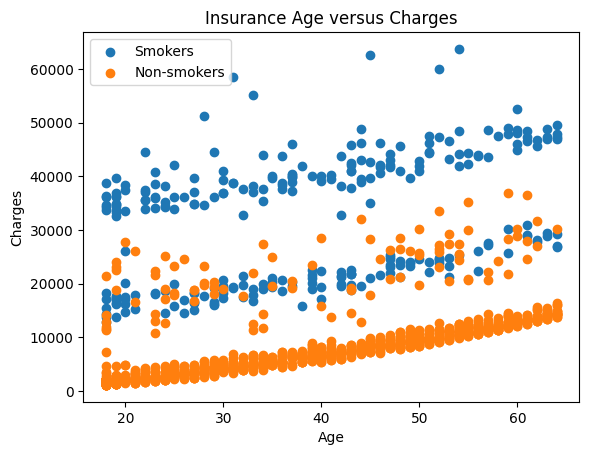

In [34]:
df_smoker = df[df['smoker'] == 'yes']
df_nonsmoker = df[df['smoker'] == 'no']

plt.scatter(df_smoker.age, df_smoker.charges, label="Smokers")
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges, label="Non-smokers")
plt.title('Insurance Age versus Charges')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

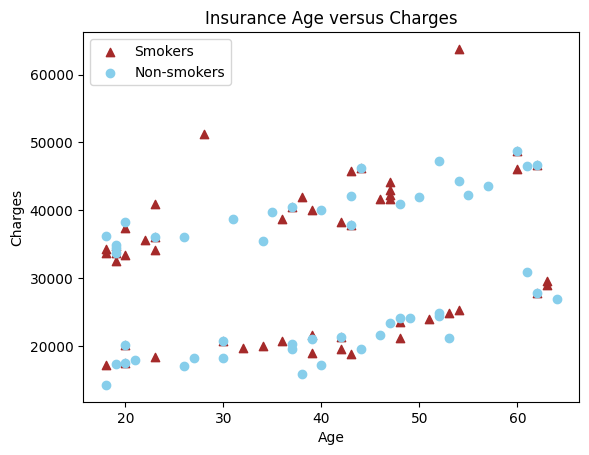

In [40]:
df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_smoker.sample(50)

plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges,
            label="Smokers", color='brown', marker='^')
plt.scatter(df_nonsmoker_reduced.age, df_nonsmoker_reduced.charges,
            label="Non-smokers", color="skyblue", marker="o")
plt.title('Insurance Age versus Charges')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

64


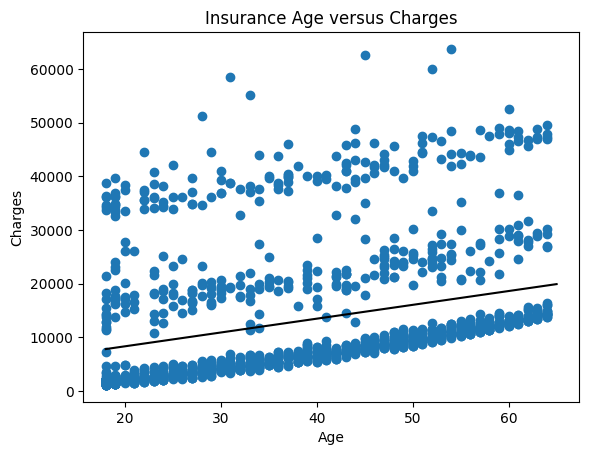

In [56]:
# from scipy import stats
m, b, r, p, err = stats.linregress(df.age, df.charges)
x = range(18, df.age.max()+2)
y = m*x + b
print(df.age.max())
plt.plot(x, y, color="black")
plt.scatter(df.age, df.charges)
plt.title('Insurance Age versus Charges')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [71]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols


model = ols(formula="charges~age", data=df).fit()

# Perform the White test
white_test = het_white(model.resid, model.model.exog)
breushpagen_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns = ['LM stat', 'LM p','F stat','F stat p'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breushpagen_test

print(output_df)

                LM stat      LM p    F stat  F stat p
White          0.002713  0.998645  0.001353  0.998648
Breusch-Pagan  0.000413  0.983776  0.000413  0.983792


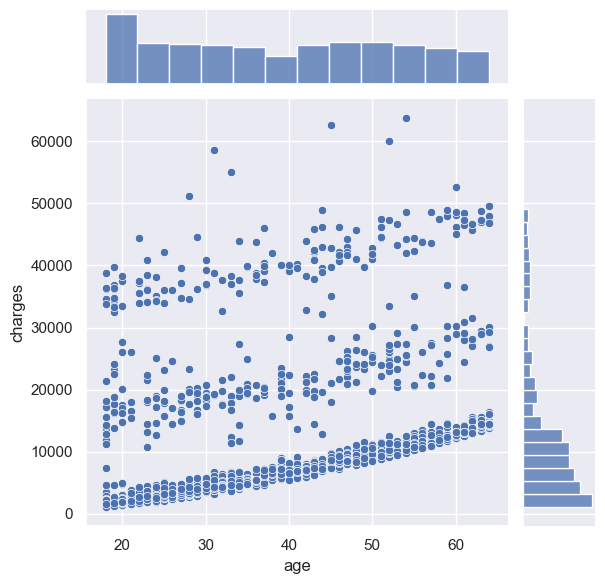

In [74]:
import seaborn as sns

sns.set(color_codes=True)
sns.jointplot(x='age', y='charges', data=df);

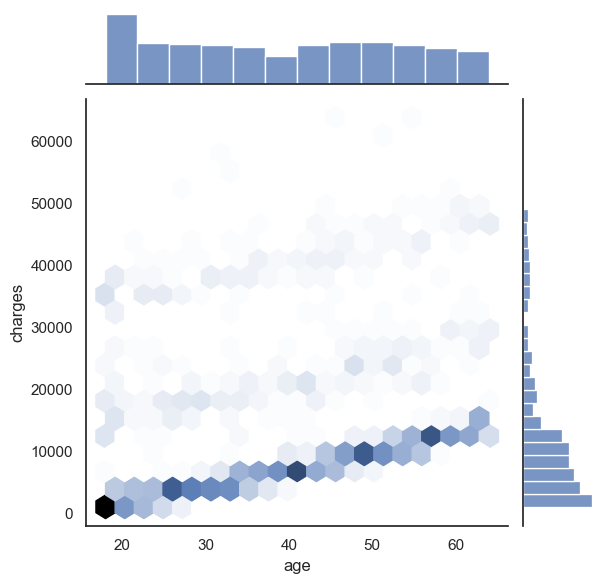

In [94]:
sns.set_style('white')
sns.jointplot(x='age', y='charges', data=df, kind='hex');

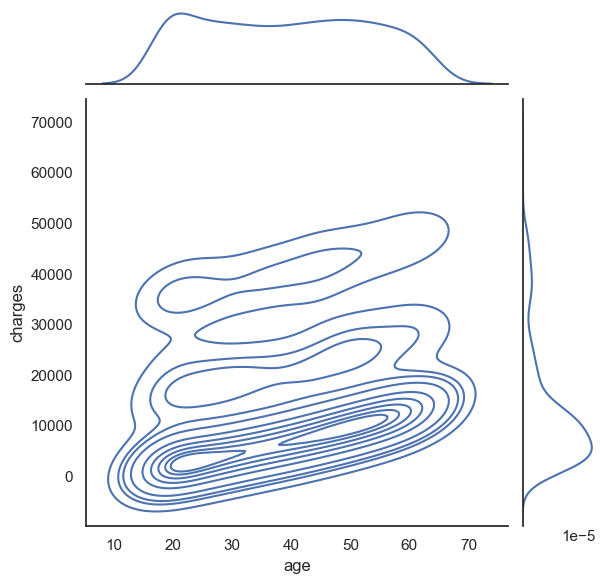

In [93]:
sns.jointplot(x='age', y='charges', data=df, kind='kde');

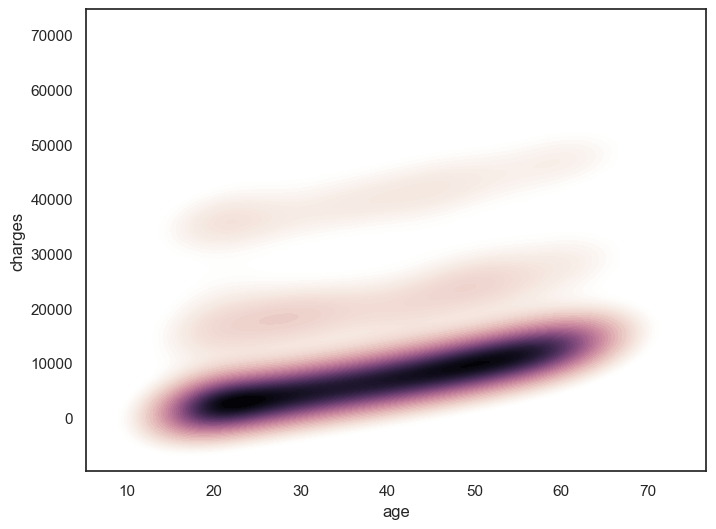

In [92]:
# f, ax = plt.subplots(figsize=(8,6))
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
# sns.kdeplot(df.age,df.charges, cmap=cmap, n_levels=60, shade=True)

f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)

# Corrected bivariate KDE plot
sns.kdeplot(x=df.age, y=df.charges, cmap=cmap, levels=60, fill=True);

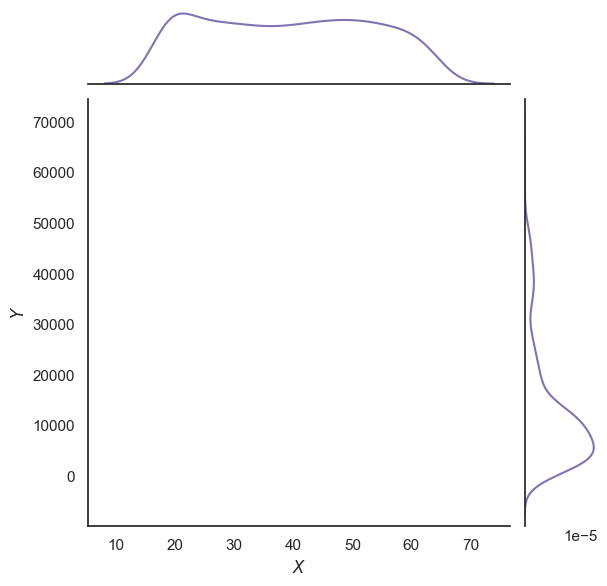

In [98]:
# E = sns.jointplot(x='age', y='charges', data=df, kind='kde', color='m')
# E.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker='+')
# E.ax_joint.collections[0].set_alpha(0)
# E.set_axis_labels('$X$', '$Y$');

E = sns.jointplot(x='age', y='charges', data=df, kind='kde', color='m')

# Overlay a scatter plot
E.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker='+')

# Make the KDE plot transparent
E.ax_joint.collections[0].set_alpha(0)

# Set axis labels
E.set_axis_labels('$X$', '$Y$')

# Display the plot
plt.show()

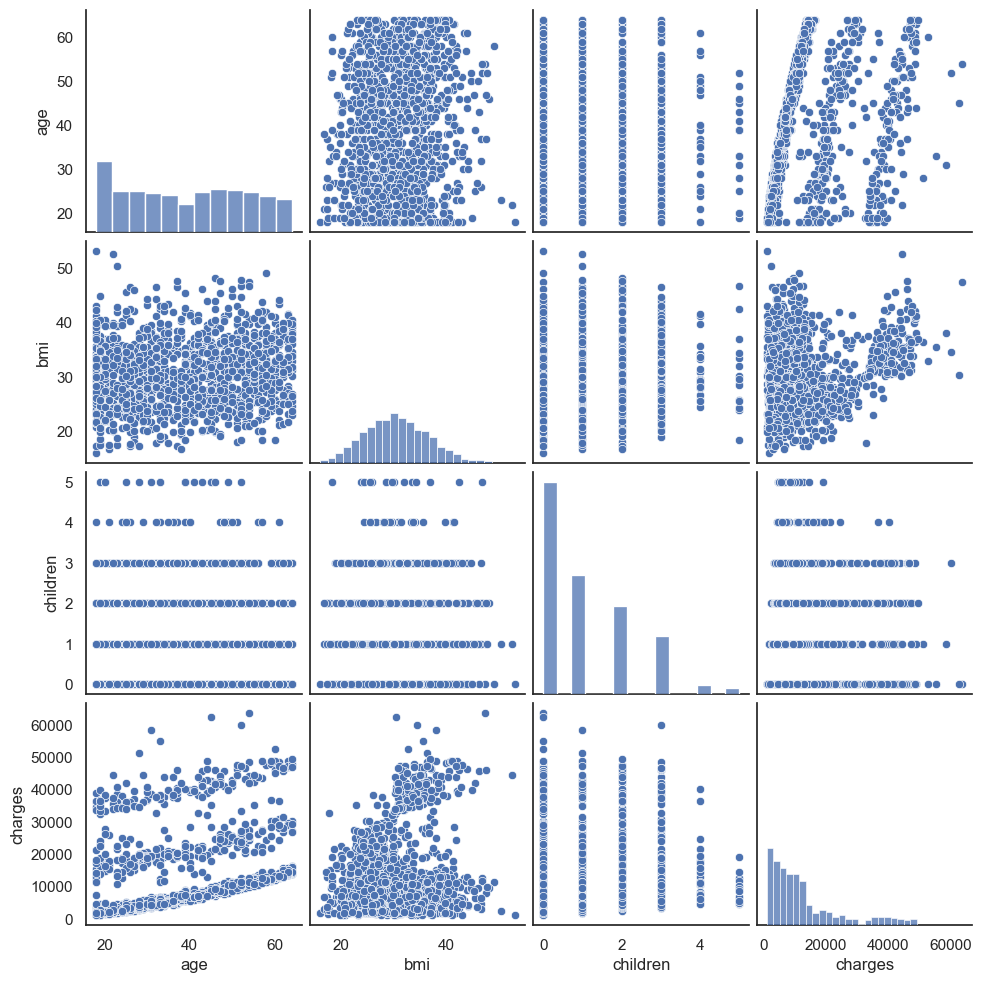

In [101]:
sns.pairplot(df);